# "Find cat's mouth with fastai"
> "Using deep learning find cat's mouth in a picture"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Peiyi Hung
- categories: [category, project, deep learning]
- image: 

# Introduction

**why?**

**task**

**Data**

# Get data

In [1]:
#!pip install --upgrade fastai

from fastai.vision.all import *

In [1]:
## set your kaggle api crediential
# !mv kaggle.json /root/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

## download the data
# !kaggle datasets download -d crawford/cat-dataset

# Read data into dataloader

In [8]:
path = Path(".")
folders = [f"CAT_0{i}" for i in range(7)]

In [9]:
def get_position(x): 
    return tensor(np.genfromtxt(Path(f"{str(x)}.cat")))[5:6]

In [10]:
def get_items(path):
    fnames = get_image_files(path, folders=folders)
    return fnames

In [ ]:
cats = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_items,
    get_y=get_position,
    splitter=RandomSplitter(),
    item_tfms=Resize(460, method="squish"),
    batch_tfms=[*aug_transforms(size=(240,320)),
                Normalize.from_stats(*imagenet_stats)]
)

In [ ]:
dls = cats.dataloaders(path, bs=32)

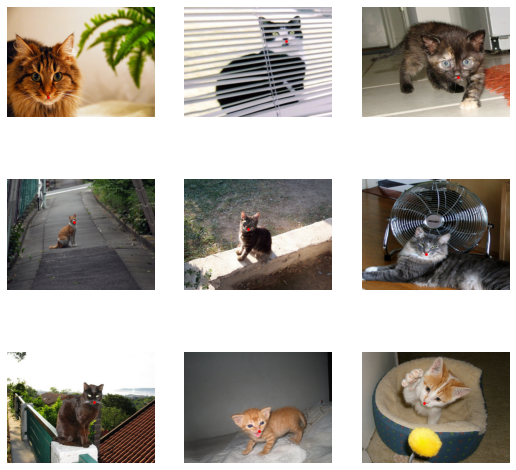

In [ ]:
dls.show_batch()

# Train a deep learning model

In [ ]:
learn = cnn_learner(dls, resnet18, y_range=(-1, 1))

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=2.75422871709452e-06)

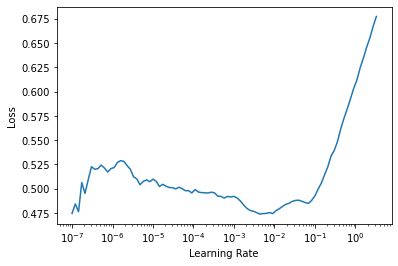

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, lr_max=3e-3)

epoch,train_loss,valid_loss,time
0,0.374339,0.176113,02:16
1,0.241387,0.106141,02:14
2,0.074582,0.049643,02:13
3,0.033304,0.016413,02:13
4,0.022394,0.013636,02:15
5,0.016272,0.009485,02:14
6,0.015388,0.007005,02:14
7,0.012350,0.005387,02:14
8,0.010811,0.005482,02:14
9,0.010149,0.005040,02:14


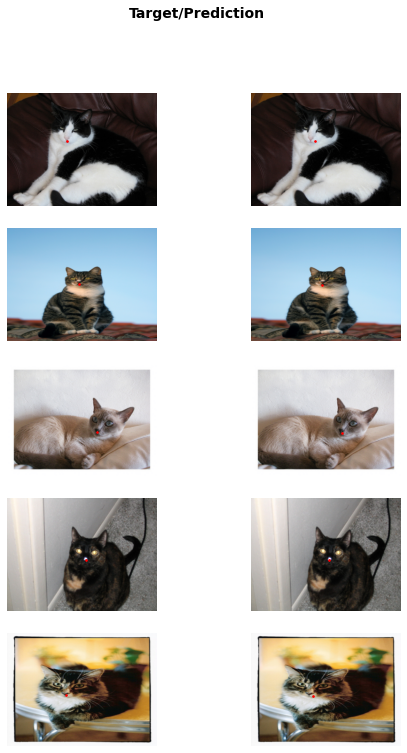

In [ ]:
learn.show_results(ds_idx=1, max_n=5, figsize=(8,12))

# Try your own cats pictures